In [91]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import scipy.io as sio
from skimage.transform import resize
from sklearn.preprocessing import MinMaxScaler

NX, NY, NZ = 160, 160, 5

In [155]:
perm_all = np.moveaxis(np.array(pd.read_csv('perm_160x160x5_n3')).reshape(NX,NY,NZ,3,order='F'), -1, 0)
print(perm_all.shape)

(3, 160, 160, 5)


***

In [92]:
n_realiations = 318
n_slices = 4
slice1, slice2, slice3, slice4 = 26, 55, 75, 102

In [210]:
k1 = np.moveaxis(np.array(pd.read_csv('rock/perm_160x160x5_n159_b1')).reshape(NX,NY,NZ,159,order='F'), -1, 0)
k2 = np.moveaxis(np.array(pd.read_csv('rock/perm_160x160x5_n159_b2')).reshape(NX,NY,NZ,159,order='F'), -1, 0)
k3 = np.moveaxis(np.array(pd.read_csv('rock/perm_160x160x5_n159_b3')).reshape(NX,NY,NZ,159,order='F'), -1, 0)
k4 = np.moveaxis(np.array(pd.read_csv('rock/perm_160x160x5_n159_b4')).reshape(NX,NY,NZ,159,order='F'), -1, 0)
k5 = np.moveaxis(np.array(pd.read_csv('rock/perm_160x160x5_n159_b5')).reshape(NX,NY,NZ,159,order='F'), -1, 0)
k6 = np.moveaxis(np.array(pd.read_csv('rock/perm_160x160x5_n159_b6')).reshape(NX,NY,NZ,159,order='F'), -1, 0)
k7 = np.moveaxis(np.array(pd.read_csv('rock/perm_160x160x5_n159_b7')).reshape(NX,NY,NZ,159,order='F'), -1, 0)
k8 = np.moveaxis(np.array(pd.read_csv('rock/perm_160x160x5_n159_b8')).reshape(NX,NY,NZ,159,order='F'), -1, 0)

k_all = np.concatenate([k1, k2, k3, k4, k5, k6, k7, k8], axis=0)
print(k_all.shape)

(1272, 160, 160, 5)


In [367]:
for i in tqdm(range(n_realiations*n_slices), desc='Processing Rock'):
    f = np.load('facies/npy/facies_{}.npy'.format(i))

    k = k_all[i]
    kk = np.log10(10**(k+3.3) * f) /  1.6
    pp = 10**((kk-9)/10)

    rock = np.stack([kk.flatten(order='F'), pp.flatten(order='F')], axis=0)
    np.savez('rock/npz/rock_{}.npz'.format(i), perm=kk, poro=pp, facies=f, rock=rock)
    sio.savemat('rock/mat/rock_{}.mat'.format(i), {'perm':kk, 'poro':pp, 'facies':f})

Processing Rock:  18%|█▊        | 224/1272 [10:40<49:40,  2.84s/it]  /tmp/ipykernel_7650/742488708.py:5: RuntimeWarning: overflow encountered in power
  kk = np.log10(10**(k+3.3) * f) /  1.6
/tmp/ipykernel_7650/742488708.py:5: RuntimeWarning: divide by zero encountered in log10
  kk = np.log10(10**(k+3.3) * f) /  1.6
Processing Rock:  21%|██        | 261/1272 [12:30<48:27,  2.88s/it]


KeyboardInterrupt: 

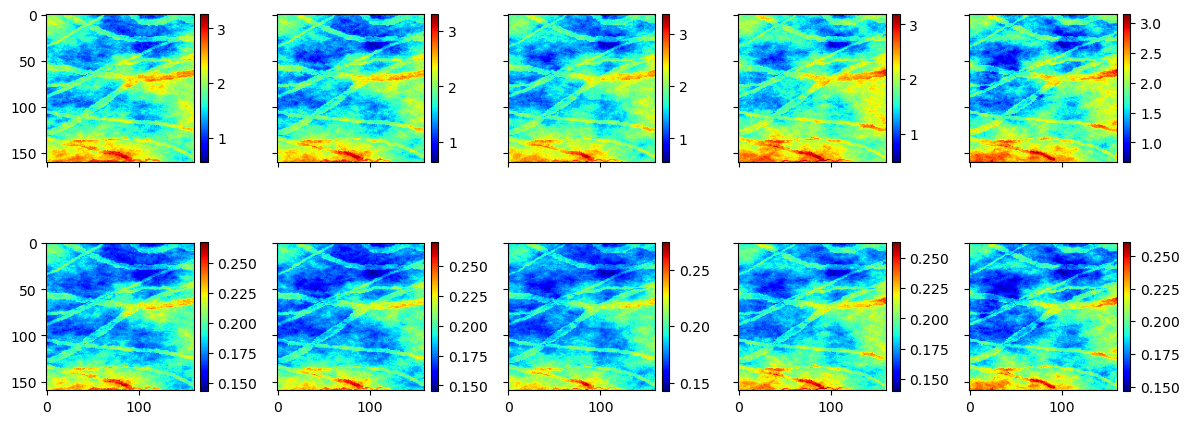

In [366]:
fig, axs = plt.subplots(2, 5, figsize=(12,5), sharex=True, sharey=True)
for i in range(2):
    for j in range(5):
        ax = axs[i,j]
        im = ax.imshow(rock[i,:,:,j], 'jet')
        plt.colorbar(im, pad=0.04, fraction=0.046)
plt.tight_layout()
plt.show()

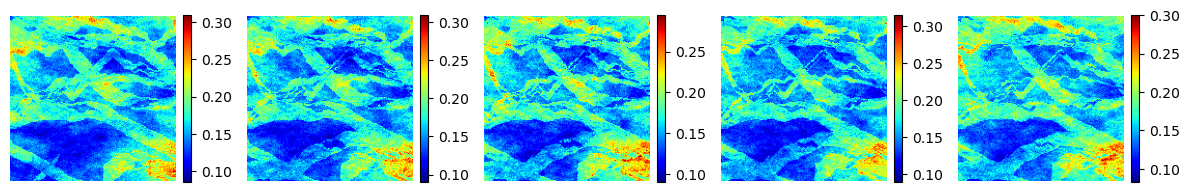

In [189]:
f = np.load('facies/npy/facies_100.npy')
k = perm_all[0]

kk = np.log10(10**k * 10**(f*1.2))
pp = 10**((kk-8.5)/10)

plt.figure(figsize=(12,4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(pp[...,i], 'jet')
    plt.colorbar(pad=0.04, fraction=0.046)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [190]:
np.max(pp)

0.31502063311903106